In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [36]:
housing = pd.read_csv(r"D:\DAIAugust2025\ML\250840128012_PML\BostonHousing.csv")
hrm = housing['RM']

<Axes: ylabel='RM'>

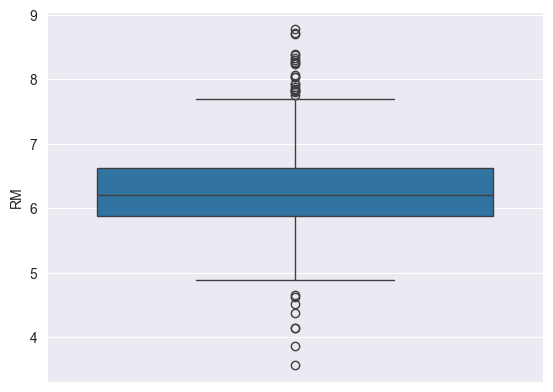

In [38]:
sns.boxplot(hrm)

In [19]:
q1 = np.percentile(housing['RM'], 25)
q3 = np.percentile(housing['RM'], 75)

iqr = q3-q1
fence1 = q1 - 1.5*iqr
fence2 = q3 + 1.5*iqr

print(f"lower fence: {fence1} upper fence: {fence2}")


lower fence: 4.778499999999999 upper fence: 7.730500000000001


In [20]:
count = 0
for rm in housing['RM']:
    if rm < fence1:
        count+=1

    elif rm > fence2:
        count+=1

print(f"count of outliers: {count}")


count of outliers: 30


In [55]:
med = housing.loc[((hrm >= fence1) & (hrm <= fence2)), 'RM'].median()
outlier_mask = (hrm < fence1) | (hrm > fence2)
housing['RM_updated'] = housing.loc[outlier_mask, 'RM'] = med


<Axes: ylabel='RM'>

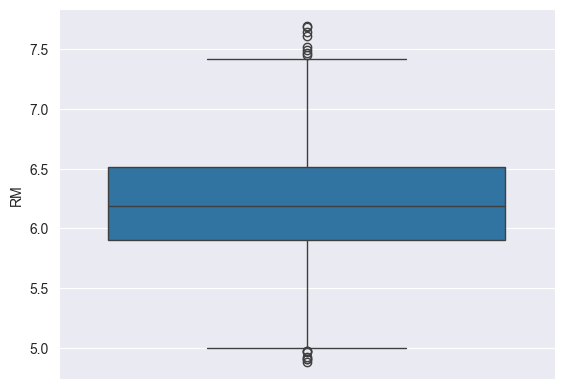

In [44]:
sns.boxplot(hrm)

In [48]:
np.random.seed(42)
X,y=housing[['RM','NOX']],housing['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

r2_after=r2_score(y_test,y_pred)
r2_after



0.3510796138122667

In [49]:
RMSE_after=root_mean_squared_error(y_test,y_pred)
RMSE_after

6.953636944214427

In [ ]:
RMSE_after=root_mean_squared_error(y_test,y_pred)
RMSE_after

In [50]:
print(f"r2_after={r2_after}, RMSE_after{RMSE_after}")

r2_after=0.3510796138122667, RMSE_after6.953636944214427
